## Hipótesis y correlación

In [1]:
%matplotlib inline
# importamos la triada de Data Science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# importamos seaborn, siguiendo la convención de renombrarlo como sns
import seaborn as sns
# archivo con funciones de visualización
import lec4_graphs as gfx
# evitar warnings y deprecaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use('seaborn') # gráficos estilo seaborn
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (6,4) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 400 # resolución gráficos

#plt.rcParams["figure.figsize"] = (60, 20) # Tamaño gráficos
#plt.rcParams["figure.dpi"] = 600 # resolución gráficos
# importamos la base de datos
df = pd.read_csv('qog_std_cs_jan18.csv')

In [2]:
df.head(10)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,28,Antigua and Barbuda,ATG,58.0,28.0,QoGStdCSJan18,NaN,NaN,11.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,31,Azerbaijan,AZE,373.0,31.0,QoGStdCSJan18,NaN,NaN,25.0,15.0,...,2.922372,2.025111,2.305843,5.581910,6.662893,4.948389,3.753472,-0.667609,-0.416085,0.152803
7,32,Argentina,ARG,160.0,32.0,QoGStdCSJan18,NaN,NaN,23.0,7.0,...,1.850180,2.163982,2.091454,6.517899,7.488213,6.504242,3.989496,0.161507,-0.103415,0.198548
8,36,Australia,AUS,900.0,36.0,QoGStdCSJan18,134.0,2.866382e+09,NaN,NaN,...,1.606337,2.209082,1.755517,6.321970,7.203336,4.063055,4.069681,1.044364,0.422270,0.518140
9,40,Austria,AUT,305.0,40.0,QoGStdCSJan18,103.0,3.775100e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Refactorizando nuestros gráficos 

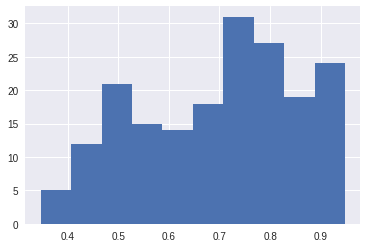

In [3]:
plt.hist(df['undp_hdi'].dropna());

## seaborn | distplot

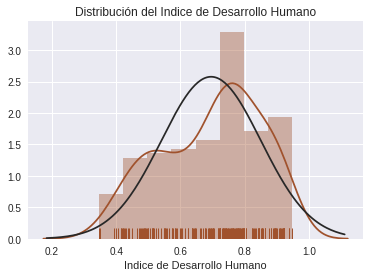

In [4]:
sns.distplot(df['undp_hdi'].dropna(), rug=True,
axlabel="Indice de Desarrollo Humano",
fit=stats.norm, color='sienna').set_title('Distribución del Indice de Desarrollo Humano');

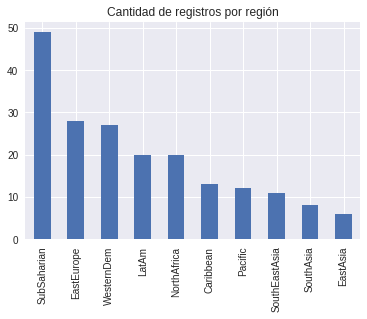

In [5]:
# generemos una variable para agregar los nombres asociados a cada número
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
['EastEurope', 'LatAm', 'NorthAfrica',
'SubSaharian', 'WesternDem', 'EastAsia',
'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])
# gráficamos en barras el resultado de value_counts.
df['region_recod'].value_counts().plot(kind='bar').set_title('Cantidad de registros por región');

## seaborn | countplot

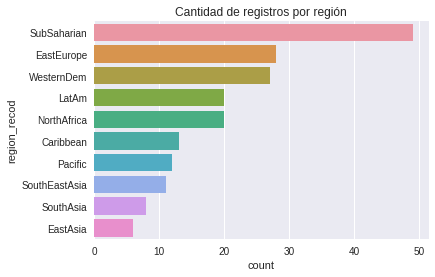

In [6]:
sns.countplot(y= df['region_recod'],
order = df['region_recod'].value_counts().index).set_title('Cantidad de registros por región');

In [7]:
# generamos una recodificación binaria con np.where
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No democracia')
submuestra = df.loc[:,['undp_hdi', 'ccodealp', 'cname', 'ht_region', 'gle_cgdpc', 'gol_inst', 'democracies']]
submuestra.sample(20)

,undp_hdi,ccodealp,cname,ht_region,gle_cgdpc,gol_inst,democracies
94,0.763,LBN,Lebanon,3,14711.97000,0.0,Democracia
33,0.764,LKA,Sri Lanka,8,5466.87010,2.0,Democracia
19,0.698,BWA,Botswana,4,12770.73000,NaN,No democracia
34,0.394,TCD,Chad,4,1651.05000,NaN,No democracia
145,0.762,KNA,St Kitts and Nevis,10,11237.75000,0.0,Democracia
148,NaN,SMR,San Marino,5,42664.21100,0.0,Democracia
59,0.894,FRA,France (1963-),5,34007.89800,1.0,Democracia
126,0.525,NGA,Nigeria,4,2246.82010,2.0,Democracia
187,0.399,BFA,Burkina Faso,4,1095.96000,NaN,No democracia
54,0.441,ETH,Ethiopia (1993-),4,900.77002,NaN,No democracia


Text(0.5, 1.0, 'Cantidad de gobiernos en cada región, según tipo de gobierno')

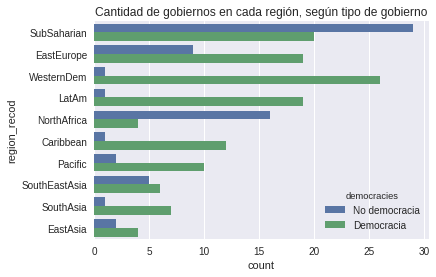

In [8]:
sns.countplot(y = df['region_recod'], hue=df['democracies'],
order = df['region_recod'].value_counts().index).set_title('Cantidad de gobiernos en cada región, según tipo de gobierno')

## swarmplot

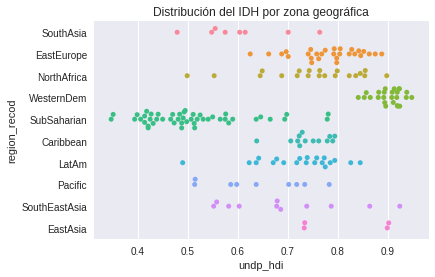

In [9]:
sns.swarmplot(y=df['region_recod'], x=df['undp_hdi']).set_title('Distribución del IDH por zona geográfica');

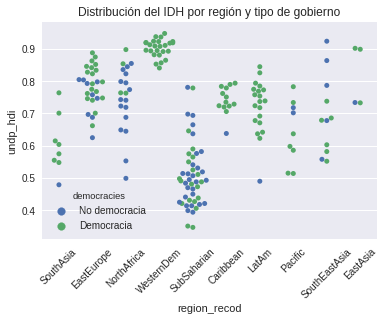

In [10]:
plt.xticks(rotation = 45)
sns.swarmplot(x=df['region_recod'], y=df['undp_hdi'], hue = df['democracies']).set_title(
'Distribución del IDH por región y tipo de gobierno');

## FacetGrid

## Iniciar un objeto FacetGrid

In [11]:
df['gol_inst'].value_counts()

0.0    54
2.0    41
1.0    32
4.0     2
Name: gol_inst, dtype: int64

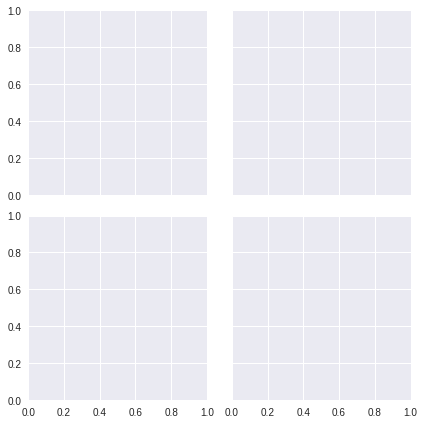

In [12]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap = 2)

## Aplicar gráficos a nuestro objeto

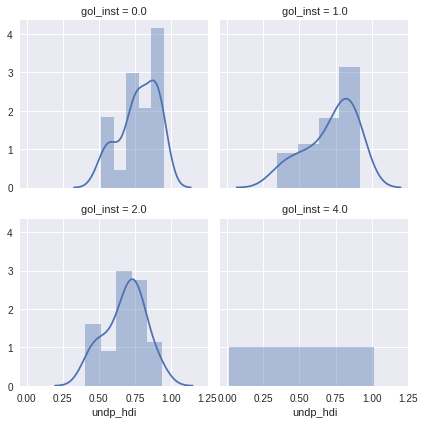

In [13]:
#sns.set(font_scale=0.8) # Escalamiento de los titulos para que no sean tan grandes
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
axes = grid.axes.flatten() # Obtener los ejes de ploteo para poder darle titulo a cada grafico
axes[0].set_title('gol_inst = 0.0 regímenes parlamentarios')
axes[1].set_title('gol_inst = 1.0 semi-presidenciales')
axes[2].set_title('gol_inst = 2.0 presidenciales')
axes[3].set_title('gol_inst = 4.0 dictaduras militares')
grid = grid.map(sns.distplot, "undp_hdi")

Al visualizar los histogramas, observamos que las distribuciones del índice de desarrollo humano
tienden a ser similares entre los regímenes parlamentarios ( gol_inst=0.0 ), semi-presidenciales
( gol_inst=1.0 ) y presidenciales ( gol_inst=2.0 ). Se observa que los regímenes presidenciales
tienden a presentar niveles de desarrollo más bajo, en comparación a los regímenes parlamentarios
y semi parlamentarios.
Con respecto al error, si investigamos un poco, encontraremos que el error con el que nos topamos
se produce cuanto un método se encuentra con un argumento de largo nulo, el error se produce
específicamente al graficar la distribución del Índice de Desarrollo Humano para las dictaduras
militares ( gol_inst=4.0 ), analicemos los datos que debían ser graficados:

In [14]:
print('Cantidad de dictaduras militares registradas: %d' %len(df.loc[df['gol_inst'] == 4.0]))
print('Cantidad de NaN en la columna \'undp_hdi\' para las dictaduras militares: %d'%df.loc[df['gol_inst'] == 4.0]['undp_hdi'].isnull().sum())

Cantidad de dictaduras militares registradas: 2
Cantidad de NaN en la columna 'undp_hdi' para las dictaduras militares: 1


La baja cantidad de dictaduras militares ( gol_inst=4.0 ) nos impide sacar cualquier conclusión
general válida con respecto al Índice de Desarrollo Humano de este tipo de gobiernos.

## Scatterplots

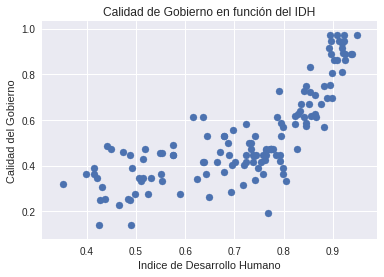

In [15]:
# generamos el gráfico
# X = Independiente
# Y = Dependiente
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.title('Calidad de Gobierno en función del IDH')
plt.xlabel("Indice de Desarrollo Humano")
plt.ylabel("Calidad del Gobierno");

A simple vista, el gráfico enseña que en la medida que el índice de desarrollo humano va
aumentando en la escala, la calidad del gobierno mejora de igual manera. Este comportamiento se
conoce como una relación directamente proporcional. Esto nos servirá para hablar de medidas de
asociación.

## Refactorizando el gráfico

## matplotlib | np.polyfit

In [16]:
# Separemos las columnas a trabajar y eliminemos los datos perdidos.
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()
scatter_data.sample(10)

,undp_hdi,icrg_qog,ccodealp
50,0.718,0.317130,DOM
181,0.748,0.388889,UKR
91,0.799,0.567130,KWT
12,0.575,0.444444,BGD
136,0.679,0.527778,PHL
171,0.738,0.416667,THA
113,0.701,0.416667,MDA
84,0.729,0.500000,JAM
168,0.938,0.888889,CHE
65,0.575,0.488426,GHA


In [17]:
# calculamos los valores de la recta
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'], scatter_data['icrg_qog'], 1)

In [18]:
pendiente

1.0077917998503934

In [19]:
intercepto

-0.1954107728917399

In [20]:
# pidamos los valores
print("La pendiente es de: ", pendiente.round(3))
print("El intercepto es de: ", intercepto.round(3))

La pendiente es de:  1.008
El intercepto es de:  -0.195


## Digresión: Comprensiones de Lista

[expresion_a_evaluar for variable in secuencia_de_valores]

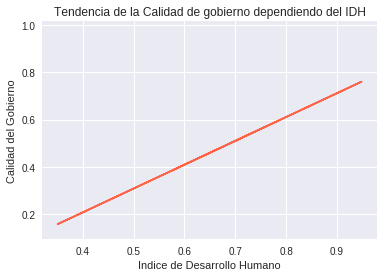

In [21]:
# para separar los elementos del gráfico, generamos dos objetos a partir de subplots
fig, ax = plt.subplots()
# generamos el gráfico, declaramos que los puntos sean lo más pequeños posible con marker="," y
s=.1
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)
# graficamos la recta a lo largo de undp_hdi
ax.plot(scatter_data['undp_hdi'],
# generamos un list comprehension que calcule el valor de la recta a lo largo de undp_hdi
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],color='tomato')
ax.set_title('Tendencia de la Calidad de gobierno dependiendo del IDH')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

In [22]:
scatter_data.head(3)

,undp_hdi,icrg_qog,ccodealp
1,0.762,0.425926,ALB
2,0.743,0.444444,DZA
4,0.531,0.344907,AGO


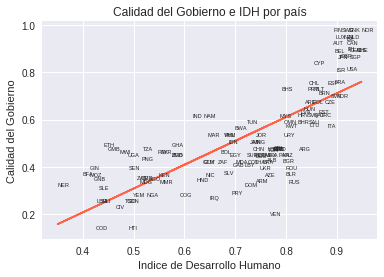

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=scatter_data['undp_hdi'], y=scatter_data['icrg_qog'], marker=",", s=.1)
ax.plot(scatter_data['undp_hdi'],
[pendiente * j + intercepto for j in scatter_data['undp_hdi']],
color='tomato')
for i in scatter_data.index:
    ax.text(scatter_data.loc[i, 'undp_hdi'],
    scatter_data.loc[i, 'icrg_qog'],str(scatter_data.loc[i, 'ccodealp']),
    fontsize = 5.5)
ax.set_title('Calidad del Gobierno e IDH por país')
ax.set_xlabel("Indice de Desarrollo Humano")
ax.set_ylabel("Calidad del Gobierno");

El gráfico nos informa de la posición de países como Haití, con un nivel bajo de desarrollo humano
y de calidad de gobierno, así como de un cluster importante de países con niveles de desarrollo
humano sobre el .90 y calidad de gobierno substancialmente alto.

## Refactorización con seaborn

## seaborn | jointplot

permite
realizar una diagrama de dispersión con más información

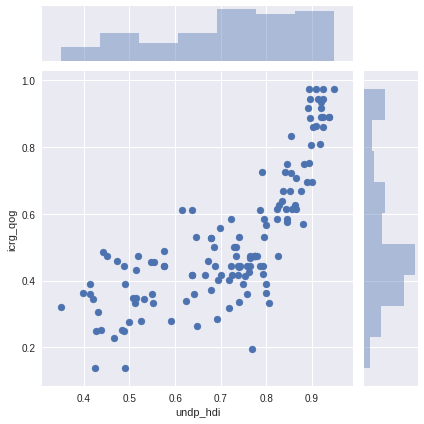

In [24]:
sns.jointplot(df['undp_hdi'], df['icrg_qog']);

## agregar una recta de ajuste

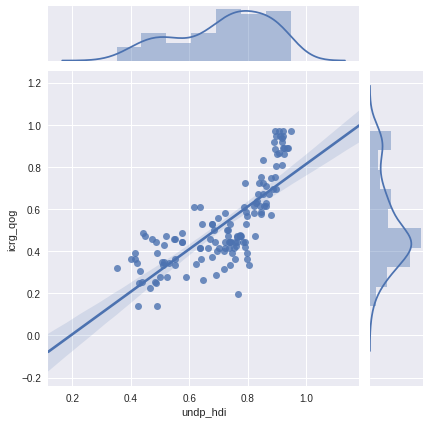

In [25]:
sns.jointplot(scatter_data['undp_hdi'], scatter_data['icrg_qog'], kind='reg');

E reporta un estadístico pearsonr = 0.77; p = 1.8e-25 . La primera cifra resume la intensidad y
dirección de la asociación, mientras que la segunda reporta su plausibilidad bajo condiciones
similares.
El primer elemento se conoce como Correlación de Pearson, y el segundo como p Value.
Dedicaremos el resto de la lectura a estudiarlos.

## Correlación y Covarianza

<b>El único objetivo de la correlación y covarianza en cuantificar el grado en que dos variables viajan
juntas.</b>

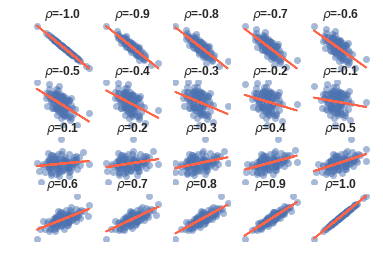

In [26]:
gfx.generate_corr_matrix();

<b>El gráfico de seaborn nos indicaba que su pearsonr era de .77. Esperamos que en la
medida que aumenten los valores del índice de desarrollo humano, también lo hagan los valores de
la calidad de gobierno</b>

## pandas | corr

In [27]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

## Matrices de correlación

In [28]:
wvs_subset = df.loc[: , 'wvs_auton':'wvs_trust']
wvs_subset.sample(5)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
38,0.659392,2.655585,3.168547,1.871829,2.993271,2.250667,2.122901,1.799864,1.790713,2.384207,...,2.410116,2.700542,2.677375,6.696889,8.388227,6.85924,4.005294,0.252633,-1.00909,0.041306
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,-0.121667,2.425021,2.370757,2.188317,2.372703,1.954035,2.338583,2.141187,2.061883,2.343129,...,2.532534,2.734483,2.695132,5.998332,6.503772,5.74750,3.979933,-0.462340,-0.07072,0.109057
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
wvs_subset['region'] = df['region_recod']
wvs_subset['country'] = df['cname']
wvs_subset.sample(5)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region,country
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SubSaharian,Chad
6,-0.723759,3.035106,2.321194,2.670265,2.351506,3.167506,2.629432,2.289796,2.786036,2.639084,...,2.305843,5.58191,6.662893,4.948389,3.753472,-0.667609,-0.416085,0.152803,EastEurope,Azerbaijan
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LatAm,El Salvador
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SouthEastAsia,Indonesia
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EastEurope,Latvia


In [30]:
wvs_subset = wvs_subset.dropna()

In [31]:
wvs_subset.sample(5)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region,country
13,0.015506,3.439688,3.187937,2.137950,2.331321,2.176698,2.027538,1.759222,1.947258,2.156231,...,2.358851,4.248916,5.240819,6.825514,3.317059,-0.592649,-0.479951,0.110230,EastEurope,Armenia
136,0.057441,2.883594,3.680651,2.775429,3.116524,2.623608,2.819785,2.492409,2.659032,2.812310,...,2.716455,6.339219,7.326415,5.644417,3.691490,0.076220,-0.683717,0.031671,SouthEastAsia,Philippines
160,-0.172764,2.478569,3.170746,2.379346,2.529673,2.427486,2.516612,2.371201,2.378740,2.413865,...,3.186284,6.129374,6.626737,6.825221,4.213035,0.045268,-0.074119,0.234122,SubSaharian,South Africa
20,0.354662,2.647916,2.810610,2.367870,2.654232,2.148636,2.373079,2.137752,1.704346,2.219243,...,2.431594,6.214656,7.840864,4.016381,3.923859,0.096261,-0.420442,0.071162,LatAm,Brazil
177,0.006440,3.109386,3.020517,2.628980,2.498549,2.706388,2.876104,2.320682,2.597923,3.037958,...,3.100911,6.174196,7.244892,5.968442,3.816401,-0.290703,-0.621699,0.122955,NorthAfrica,Turkey


## sns.heatmap

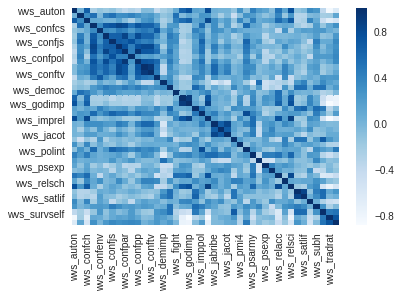

In [32]:
corr_mat = wvs_subset.corr()
# output omitido
# corr_mat
sns.heatmap(corr_mat, cmap='Blues');

Para este ejemplo, exploraremos las relaciones entre las creencias religiosas y felicidad de las
naciones. Partamos por seleccionar las columnas con .loc :

In [33]:
working_subset = wvs_subset.loc[:, ['wvs_godbel', 'wvs_godimp', 'wvs_hap', 'wvs_imprel']]

Las variables que seleccionamos son:
* wvs_godbel : Porcentaje de gente que cree en Dios.
* wvs_godimp : Qué tan importante es Dios en la vida de las personas.
* wvs_hap : Felicidad reportada por los encuestados.
* wvs_imprel : Qué tan importante es la religión en la vida de las personas.

In [34]:
working_subset.sample(1)

,wvs_godbel,wvs_godimp,wvs_hap,wvs_imprel
98,0.997463,9.724662,3.243026,3.960743


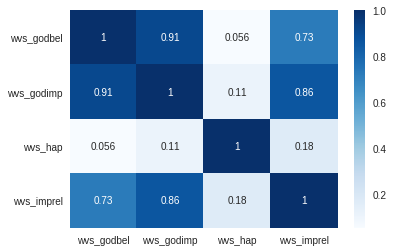

In [35]:
corr_mat = working_subset.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True);

* Hay correlaciones de una magnitud susbtancial entre la importancia de Dios, de la religión y la
creencia a nivel mundial.
* No hay correlaciones substanciales entre los niveles de felicidad reportados y la importancia
asignada a la reglión en general.

# Pruebas de Hipótesis

## Ejemplo: Niveles de confianza interpersonal

## ¿El nivel de confianza interpersonal a nivel mundial es distinto a .7.?

<b>Hipótesis nula (Ho): el nivel de confianza interpersonal no es distinto al criterio propuesto de .7.</b>

<b>hipótesis alternativa (H1): el nivel de confianza interpersonal es distinto al criterio propuesto de .7</b>

## ¿  Que necesitamos para generar una prueba de hipótesis ?

<b>Un estadístico de prueba que refleje un punto estimado por nosotros (proporción estimada en la muestra).</b>

<b>Una distribución nula que refleje el nulo efecto de nuestro punto estimado (criterio propuesto de .7.).</b>

<b>Un puntaje de corte o criterio arbitrario que permita evaluar nuestro estadístico de prueba</b>

## Calculando estadísticos de prueba

<b>Primer paso para generar una prueba de hipótesis es similar a calcular un puntaje z</b>

* Primero calculemos la diferencia entre la media de la variable y el valor a contrastar

In [37]:
diff = np.mean(wvs_subset['wvs_trust']) - 0.7
diff

-0.4762302169777777

* Ahora estimemos la varianza ajustada por la muestra. Esto se logra al dividirla por N y sacar su raíz cuadrada

In [38]:
std_err = np.sqrt(np.var(wvs_subset['wvs_trust'], ddof=1) / float(wvs_subset['wvs_trust'].shape[0]))
std_err

0.0253710754471492

Al dividir la diferencia por la varianza, obtenemos el puntaje a evaluar. Esta es la distribución de la hipótesis nula

En este ejemplo, buscamos evidencia a favor para rechazar la hipótesis nula si nuestro puntaje está
más alejado que cierto criterio predefinido

In [40]:
diff / std_err

-18.770596381293284

## P-values: criterios arbitrarios

<b>Rechazo de la Hipótesis Nula</b>: Situación donde nuestro <b>puntaje de prueba calculado</b> es
<b>mayor</b> que el <b>criterio de corte</b>. Bajo este caso, nuestro efecto tiene un mayor respaldo que sea
estadísticamente significativo.

<b>Fallar en Rechazar la Hipótesis Nula:</b> Situación donde nuestro puntaje de prueba calculado
es menor que el criterio de corte. En este escenario nuestro efecto no tiene el respaldo
suficiente como para decir que es estadísticamente significativo.

### ¿Nuestra hipótesis cae en la región de la hipótesis nula o no?

* Al 90% de la distribución, equivalente a un puntaje de corte de 1.68.
* Al 95% de la distribución, equivalente a un puntaje de corte de 1.96.
* Al 99% de la distribución, equivalente a un puntaje de corte de 2.58.

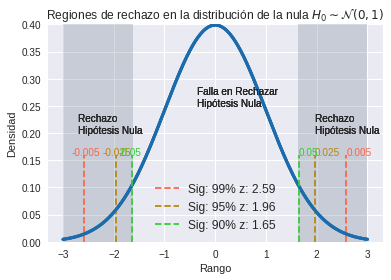

In [42]:
gfx.graph_significance();

Puntaje de la prueba: -18.770596381293284

Si sabemos que el puntaje de la prueba <b>-18.7</b> y seguimos los criterios
comunes de evaluar el estadístico al <b>95%</b> de confianza <b>(1.96)</b>, 
hay evidencia como para <b>rechazar la hipótesis nula</b> dado que nuestro puntaje de <b>|-18.7|</b> 
es mayor a <b>1.96</b>. De esta forma, se concluye que la media de la confianza interpersonal 
en el mundo distinta a .7, siendo significativa al <b>95%</b> de <b>"confianza"</b>.

## ttest_1samp | scipy.stats (estadístico de prueba y agrega el pvalue)

In [44]:
stats.ttest_1samp(wvs_subset['wvs_trust'], .7)

Ttest_1sampResult(statistic=-18.770596381293288, pvalue=1.2609756204715342e-22)

### ¿ Como puedo fallar en contra de la hipótesis nula? o ¿Como puedo aceptar la hipostesis alternativa e investigadora?

Si nuestro <b>p-valor</b> es menor o igual a <b>0.05 (5%)</b>, entonces podemos decir que 
tenemos un <b>95%</b> de certeza de que podemos que podemos rechazar la hipotesis nula <b>(la media muestral
es igual a la media poblacional de 0.7)</b>. 
Nuestra hipotesis alternativa o investigadora es cierta <b>(el nivel de confianza interpersonal es distinto al criterio propuesto de .7.)</b>. Prácticamente un 100% de certeza.

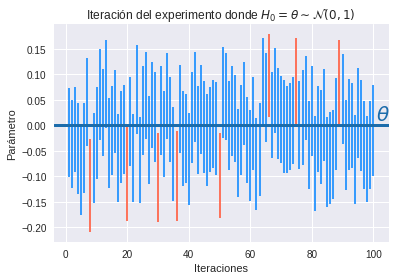

In [45]:
gfx.confidence_intervals()
plt.title(r'Iteración del experimento donde $H_{0} = \theta\sim\mathcal{N}(0,1)$');

## Prueba de hipótesis para muestras independientes

## Ejemplo: Vamos a comparar medias de dos grupos

## 1- Definir Hipotesis
* ¿Las tasas de confianza interpersonal son distintas entre los países de europa occidental y el resto del mundo?

<b>(H0) Hipótesis Nula</b>: Las tasas de confianza interpersonal son similares entre los países de europa
occidental y el resto del mundo.

<b>(H1) Hipótesis Alternativa:</b> Las tasas de confianza interpersonal son distintas entre los países de
europa occidental y el resto del mundo.

In [59]:
wvs_subset['western_dm'] = np.where(wvs_subset['region'] == 'WesternDem', 1, 0)

In [60]:
wvs_subset.sample(10)

,wvs_auton,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,...,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region,country,western_dm
123,-0.619501,3.017995,2.405298,2.487671,2.609164,2.486842,2.750636,2.134978,2.332026,3.082294,...,6.881995,7.648975,4.909091,4.146135,1.259925,0.371845,0.567766,WesternDem,New Zealand,1
136,0.057441,2.883594,3.680651,2.775429,3.116524,2.623608,2.819785,2.492409,2.659032,2.812310,...,6.339219,7.326415,5.644417,3.691490,0.076220,-0.683717,0.031671,SouthEastAsia,Philippines,0
7,0.224245,2.122968,2.539607,1.868847,2.518353,2.110704,1.859460,1.840580,2.006855,1.969954,...,6.517899,7.488213,6.504242,3.989496,0.161507,-0.103415,0.198548,LatAm,Argentina,0
121,-0.582019,2.529307,1.973219,2.270056,2.423122,2.218974,2.691886,2.343143,2.234596,2.697118,...,6.916266,7.492561,3.861832,3.875066,1.063929,0.753645,0.674169,WesternDem,Netherlands,1
92,-0.497333,2.724230,2.483176,2.627845,2.559572,2.566644,2.434404,2.536504,2.522148,2.539799,...,6.380667,6.963087,5.668449,3.908545,-0.355836,-0.341541,0.380420,EastEurope,Kyrgyzstan,0
144,0.371316,2.784545,2.709889,2.706614,2.506876,2.781925,2.695481,2.524558,2.745252,2.736084,...,6.092993,6.467584,5.297315,4.125082,-0.302333,-0.651231,0.166339,SubSaharian,Rwanda,0
56,-0.423809,2.851419,2.695976,2.732372,2.838188,2.471703,2.717542,2.559539,2.262802,2.928694,...,5.343462,6.251011,5.006933,3.512901,-0.301599,0.826210,0.400747,EastEurope,Estonia,0
162,-0.386295,2.460377,2.026476,2.276417,2.582531,1.931376,2.325540,1.925435,2.208483,2.585104,...,5.557984,6.792777,5.291526,3.896562,0.346304,0.494688,0.195657,WesternDem,Spain,1
167,-0.872751,2.526960,2.434595,2.578491,2.778236,2.598207,2.926639,2.492113,2.616901,2.916005,...,6.944547,7.548718,3.235888,4.032868,1.513079,1.188317,0.617692,WesternDem,Sweden,1
65,0.696861,3.140650,3.532123,2.817027,2.920933,2.732990,2.720919,2.672168,2.605052,2.662275,...,4.521121,6.142305,5.961647,4.343649,-0.421358,-1.138105,0.050309,SubSaharian,Ghana,0


## 2- Escoger el test estadistico

In [61]:
stats.ttest_ind(wvs_subset.query('western_dm == 1')['wvs_trust'],
                wvs_subset.query('western_dm == 0')['wvs_trust'])

Ttest_indResult(statistic=5.108950860705963, pvalue=7.079387187592779e-06)

In [62]:
print("Media Europa Occidental:", wvs_subset.query('western_dm ==1')['wvs_trust'].mean())
print("Media Resto del Mundo:", wvs_subset.query('western_dm ==0')['wvs_trust'].mean())

Media Europa Occidental: 0.48746986333333336
Media Resto del Mundo: 0.18320053989743593


### Interpretar resultado:
La evidencia entregada por <b>ttest_ind</b> sugiere que la diferencia en las tasas de confianza
interpersonal entre ambos grupos es significativa al <b>95%</b>. Las tasas para europa occidental
corresponden a <b>.48</b>, mientras que en el resto del mundo son <b>.18</b>. En promedio esperamos que los
europeos presenten mayores tasas de confianza entre sí.

## Distribución T

Es de utilidad cuando nuestras <b>muestras son pequeñas</b> y deseamos genear pruebas de hipótesis
más exactas.

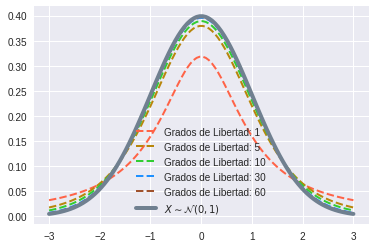

In [63]:
gfx.t_distribution()